In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')

In [28]:
# T·∫£i d·ªØ li·ªáu tr·ª±c ti·∫øp
from pathlib import Path

# ƒê·ªãnh nghƒ©a ƒë∆∞·ªùng d·∫´n
project_root = Path.cwd().parent
data_dir = project_root / "data" / "raw"

# Import tr·ª±c ti·∫øp 2 dataset
df_sentiment = pd.read_csv(data_dir / "data_sentiment.csv", encoding='utf-8')
df_summary = pd.read_csv(data_dir / "data_summary.csv", encoding='utf-8')

# T·∫°o dictionary ƒë·ªÉ d·ªÖ x·ª≠ l√Ω
datasets = {
    'sentiment': df_sentiment,
    'summary': df_summary
}

print(f"Sentiment: {len(df_sentiment):,} h√†ng, {len(df_sentiment.columns)} c·ªôt")
print(f"Summary: {len(df_summary):,} h√†ng, {len(df_summary.columns)} c·ªôt")

Sentiment: 31,460 h√†ng, 4 c·ªôt
Summary: 102,681 h√†ng, 3 c·ªôt


In [ ]:
# Ph√¢n t√≠ch c·∫•u tr√∫c dataset
print("c·∫•u tr√∫c c·ªßa c√°c datasets")
for name, df in datasets.items():
    print(f"\nDataset {name.lower()}:")
    print(f"K√≠ch th∆∞·ªõc: {df.shape}")
    print(f"C·ªôt: {list(df.columns)}")
    
    display(df.head(3))

c·∫•u tr√∫c c·ªßa c√°c datasets

Dataset sentiment:
K√≠ch th∆∞·ªõc: (31460, 4)
C·ªôt: ['comment', 'label', 'rate', 'Unnamed: 3']
B·ªô nh·ªõ s·ª≠ d·ª•ng: 8.27 MB


comment label  rate Unnamed: 3
0              √Åo bao ƒë·∫πp ·∫°!!   POS     5        NaN
1                 Tuy·ªát v·ªùi !   POS     5        NaN
2  2day ao khong giong trong.   NEG     1        NaN


Dataset summary:
K√≠ch th∆∞·ªõc: (102681, 3)
C·ªôt: ['Unnamed: 0', 'Summary', 'Text']
B·ªô nh·ªõ s·ª≠ d·ª•ng: 677.06 MB


Unnamed: 0                                            Summary  \
0           0  Ngay khi b·∫Øt tay ai ƒë√≥ c√≥ th·ªÉ ch√∫ng ta ƒë√£ c·∫£m ...   
1           1  R·ªùi kh·ªèi Vi·ªát Nam v√†o 10/2016, √¥ng V≈© ƒê√¨nh Duy...   
2           2  Th·ªß t∆∞·ªõng Iraq x√°c nh·∫≠n v·ªõi BBC r·∫±ng Syria kh√¥...   

                                                Text  
0  T·ªïng th·ªëng M·ªπ Donald Trump v√† T·ªïng th·ªëng Ph√°p ...  
1  V≈© ƒê√¨nh Duy h·ªìi th√°ng 5 xu·∫•t hi·ªán tr∆∞·ªõc t√≤a t·∫°...  
2  √îng Maliki x√°c nh·∫≠n c√°c v·ª• kh√¥ng k√≠ch c·ªßa Syri...

In [21]:
# ƒê√°nh gi√° ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu
print("ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu")

def phan_tich_chat_luong(df, ten_dataset):
    print(f"\nDataset {ten_dataset.lower()}:")
    
    # Gi√° tr·ªã thi·∫øu
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("Kh√¥ng c√≥ gi√° tr·ªã thi·∫øu")
    else:
        print("Gi√° tr·ªã thi·∫øu:")
        for col in missing[missing > 0].index:
            pct = (missing[col] / len(df)) * 100
            print(f"  {col}: {missing[col]} ({pct:.1f}%)")
    
    # H√†ng tr√πng l·∫∑p
    duplicates = df.duplicated().sum()
    duplicate_pct = (duplicates / len(df)) * 100
    print(f"H√†ng tr√πng l·∫∑p: {duplicates} ({duplicate_pct:.1f}%)")
    
    # Ph√¢n t√≠ch c·ªôt vƒÉn b·∫£n
    text_cols = df.select_dtypes(include=['object']).columns
    print("Ph√¢n t√≠ch c·ªôt vƒÉn b·∫£n:")
    
    for col in text_cols:
        if df[col].dtype == 'object':
            empty_strings = (df[col].astype(str).str.strip() == '').sum()
            unique_count = df[col].nunique()
            avg_length = df[col].astype(str).str.len().mean()
            
            print(f"  {col}:")
            print(f"Chu·ªói r·ªóng: {empty_strings}")
            print(f"Gi√° tr·ªã duy nh·∫•t: {unique_count}")
            print(f"ƒê·ªô d√†i trung b√¨nh: {avg_length:.1f} k√Ω t·ª±")
    
    return {
        'missing_values': missing.sum(),
        'duplicates': duplicates,
        'total_rows': len(df)
    }

# Ph√¢n t√≠ch t·ª´ng dataset
quality_reports = {}
for name, df in datasets.items():
    quality_reports[name] = phan_tich_chat_luong(df, name)

ch·∫•t l∆∞·ª£ng d·ªØ li·ªáu

Dataset sentiment:
Gi√° tr·ªã thi·∫øu:
  Unnamed: 3: 31437 (99.9%)
H√†ng tr√πng l·∫∑p: 3982 (12.7%)
Ph√¢n t√≠ch c·ªôt vƒÉn b·∫£n:
  comment:
Chu·ªói r·ªóng: 0
Gi√° tr·ªã duy nh·∫•t: 26803
ƒê·ªô d√†i trung b√¨nh: 44.9 k√Ω t·ª±
  label:
Chu·ªói r·ªóng: 0
Gi√° tr·ªã duy nh·∫•t: 3
ƒê·ªô d√†i trung b√¨nh: 3.0 k√Ω t·ª±
  Unnamed: 3:
Chu·ªói r·ªóng: 0
Gi√° tr·ªã duy nh·∫•t: 1
ƒê·ªô d√†i trung b√¨nh: 3.0 k√Ω t·ª±

Dataset summary:
Gi√° tr·ªã thi·∫øu:
  Text: 32 (0.0%)
H√†ng tr√πng l·∫∑p: 0 (0.0%)
Ph√¢n t√≠ch c·ªôt vƒÉn b·∫£n:
  Summary:
Chu·ªói r·ªóng: 0
Gi√° tr·ªã duy nh·∫•t: 89571
ƒê·ªô d√†i trung b√¨nh: 140.6 k√Ω t·ª±
H√†ng tr√πng l·∫∑p: 0 (0.0%)
Ph√¢n t√≠ch c·ªôt vƒÉn b·∫£n:
  Summary:
Chu·ªói r·ªóng: 0
Gi√° tr·ªã duy nh·∫•t: 89571
ƒê·ªô d√†i trung b√¨nh: 140.6 k√Ω t·ª±
  Text:
Chu·ªói r·ªóng: 63
Gi√° tr·ªã duy nh·∫•t: 96284
ƒê·ªô d√†i trung b√¨nh: 3231.2 k√Ω t·ª±
  Text:
Chu·ªói r·ªóng: 63
Gi√° tr·ªã duy nh·∫•t: 96284
ƒê·ªô d√†i trung b√¨nh: 3231.2 k√Ω t·ª±


In [23]:
# Ph√¢n t√≠ch vƒÉn b·∫£n
print("ph√¢n t√≠ch vƒÉn b·∫£n")

# Sentiment dataset
df_sent = datasets['sentiment']
comment_lengths = df_sent['comment'].astype(str).str.len()
comment_words = df_sent['comment'].astype(str).str.split().str.len()

print(f"\nDataset sentiment (comment):")
print(f"ƒê·ªô d√†i trung b√¨nh: {comment_lengths.mean():.1f} k√Ω t·ª±")
print(f"S·ªë t·ª´ trung b√¨nh: {comment_words.mean():.1f} t·ª´")

# Summary dataset
df_summ = datasets['summary']
text_lengths = df_summ['Text'].astype(str).str.len()
summary_lengths = df_summ['Summary'].astype(str).str.len()

print(f"\nDataset summary:")
print(f"Text - ƒê·ªô d√†i TB: {text_lengths.mean():.1f} k√Ω t·ª±")
print(f"Summary - ƒê·ªô d√†i TB: {summary_lengths.mean():.1f} k√Ω t·ª±")
print(f"T·ª∑ l·ªá n√©n: {(summary_lengths.mean() / text_lengths.mean()):.3f}")

ph√¢n t√≠ch vƒÉn b·∫£n

Dataset sentiment (comment):
ƒê·ªô d√†i trung b√¨nh: 44.9 k√Ω t·ª±
S·ªë t·ª´ trung b√¨nh: 10.2 t·ª´

Dataset summary:
Text - ƒê·ªô d√†i TB: 3231.2 k√Ω t·ª±
Summary - ƒê·ªô d√†i TB: 140.6 k√Ω t·ª±
T·ª∑ l·ªá n√©n: 0.044


In [25]:
# Ph√¢n t√≠ch sentiment
print("ph√¢n t√≠ch sentiment")

df_sent = datasets['sentiment']

# Ph√¢n ph·ªëi nh√£n
label_counts = df_sent['label'].value_counts()
print(f"\nPh√¢n ph·ªëi nh√£n:")
for label, count in label_counts.items():
    pct = (count / len(df_sent)) * 100
    print(f"  {label}: {count:,} ({pct:.1f}%)")

ph√¢n t√≠ch sentiment

Ph√¢n ph·ªëi nh√£n:
  POS: 20,093 (63.9%)
  NEG: 6,669 (21.2%)
  NEU: 4,698 (14.9%)


In [26]:
# Ph√¢n t√≠ch summary
print("ph√¢n t√≠ch summary")

df_summ = datasets['summary']

# T√≠nh to√°n c∆° b·∫£n
text_lengths = df_summ['Text'].astype(str).str.len()
summary_lengths = df_summ['Summary'].astype(str).str.len()
text_words = df_summ['Text'].astype(str).str.split().str.len()
summary_words = df_summ['Summary'].astype(str).str.split().str.len()

compression_ratio = summary_lengths.mean() / text_lengths.mean()

print(f"\nTh·ªëng k√™:")
print(f"VƒÉn b·∫£n g·ªëc: {text_lengths.mean():.1f} k√Ω t·ª±, {text_words.mean():.1f} t·ª´")
print(f"T√≥m t·∫Øt: {summary_lengths.mean():.1f} k√Ω t·ª±, {summary_words.mean():.1f} t·ª´")
print(f"T·ª∑ l·ªá n√©n: {compression_ratio:.3f}")

# V√≠ d·ª•
print(f"\nV√≠ d·ª•:")
sample = df_summ.iloc[0]
print(f"Text: {str(sample['Text'])[:100]}...")
print(f"Summary: {sample['Summary']}")

ph√¢n t√≠ch summary

Th·ªëng k√™:
VƒÉn b·∫£n g·ªëc: 3231.2 k√Ω t·ª±, 704.2 t·ª´
T√≥m t·∫Øt: 140.6 k√Ω t·ª±, 30.6 t·ª´
T·ª∑ l·ªá n√©n: 0.044

V√≠ d·ª•:
Text: T·ªïng th·ªëng M·ªπ Donald Trump v√† T·ªïng th·ªëng Ph√°p Emmanuel Macron ƒëi c·∫°nh nhau, n·∫Øm chƒÉÃ£t tay nhau. Lo·∫°i...
Summary: Ngay khi b·∫Øt tay ai ƒë√≥ c√≥ th·ªÉ ch√∫ng ta ƒë√£ c·∫£m gi√°c ƒë∆∞·ª£c l√† c√≥ c√°i g√¨ ƒë√≥ sai sai, nh∆∞ng l·∫°i kh√¥ng th·ªÉ bi·∫øt ƒë√≠ch x√°c l√† t·∫°i sao. Gi·ªØ tay qu√° l√¢u, n·∫Øm qu√° chƒÉÃ£t, hay k√©o tay khi·∫øn hai ng∆∞·ªùi g·∫ßn s√°t nhau qu√°... nh·ªØng th·ª© ƒë√≥ ƒë·ªÅu c√≥ th·ªÉ ·∫£nh h∆∞·ªüng t·ªõi ph·∫ßn c√≤n l·∫°i c·ªßa cu√¥Ã£c gƒÉÃ£p g·ª°.

Th·ªëng k√™:
VƒÉn b·∫£n g·ªëc: 3231.2 k√Ω t·ª±, 704.2 t·ª´
T√≥m t·∫Øt: 140.6 k√Ω t·ª±, 30.6 t·ª´
T·ª∑ l·ªá n√©n: 0.044

V√≠ d·ª•:
Text: T·ªïng th·ªëng M·ªπ Donald Trump v√† T·ªïng th·ªëng Ph√°p Emmanuel Macron ƒëi c·∫°nh nhau, n·∫Øm chƒÉÃ£t tay nhau. Lo·∫°i...
Summary: Ngay khi b·∫Øt tay ai ƒë√≥ c√≥ th·ªÉ ch√∫ng ta ƒë√£ c·∫£m gi√°c ƒë∆∞·ª£c 

CREATING VISUALIZATION DASHBOARD
Creating visualizations for sentiment dataset...
Creating visualizations for summary dataset...
Creating visualizations for news dataset...


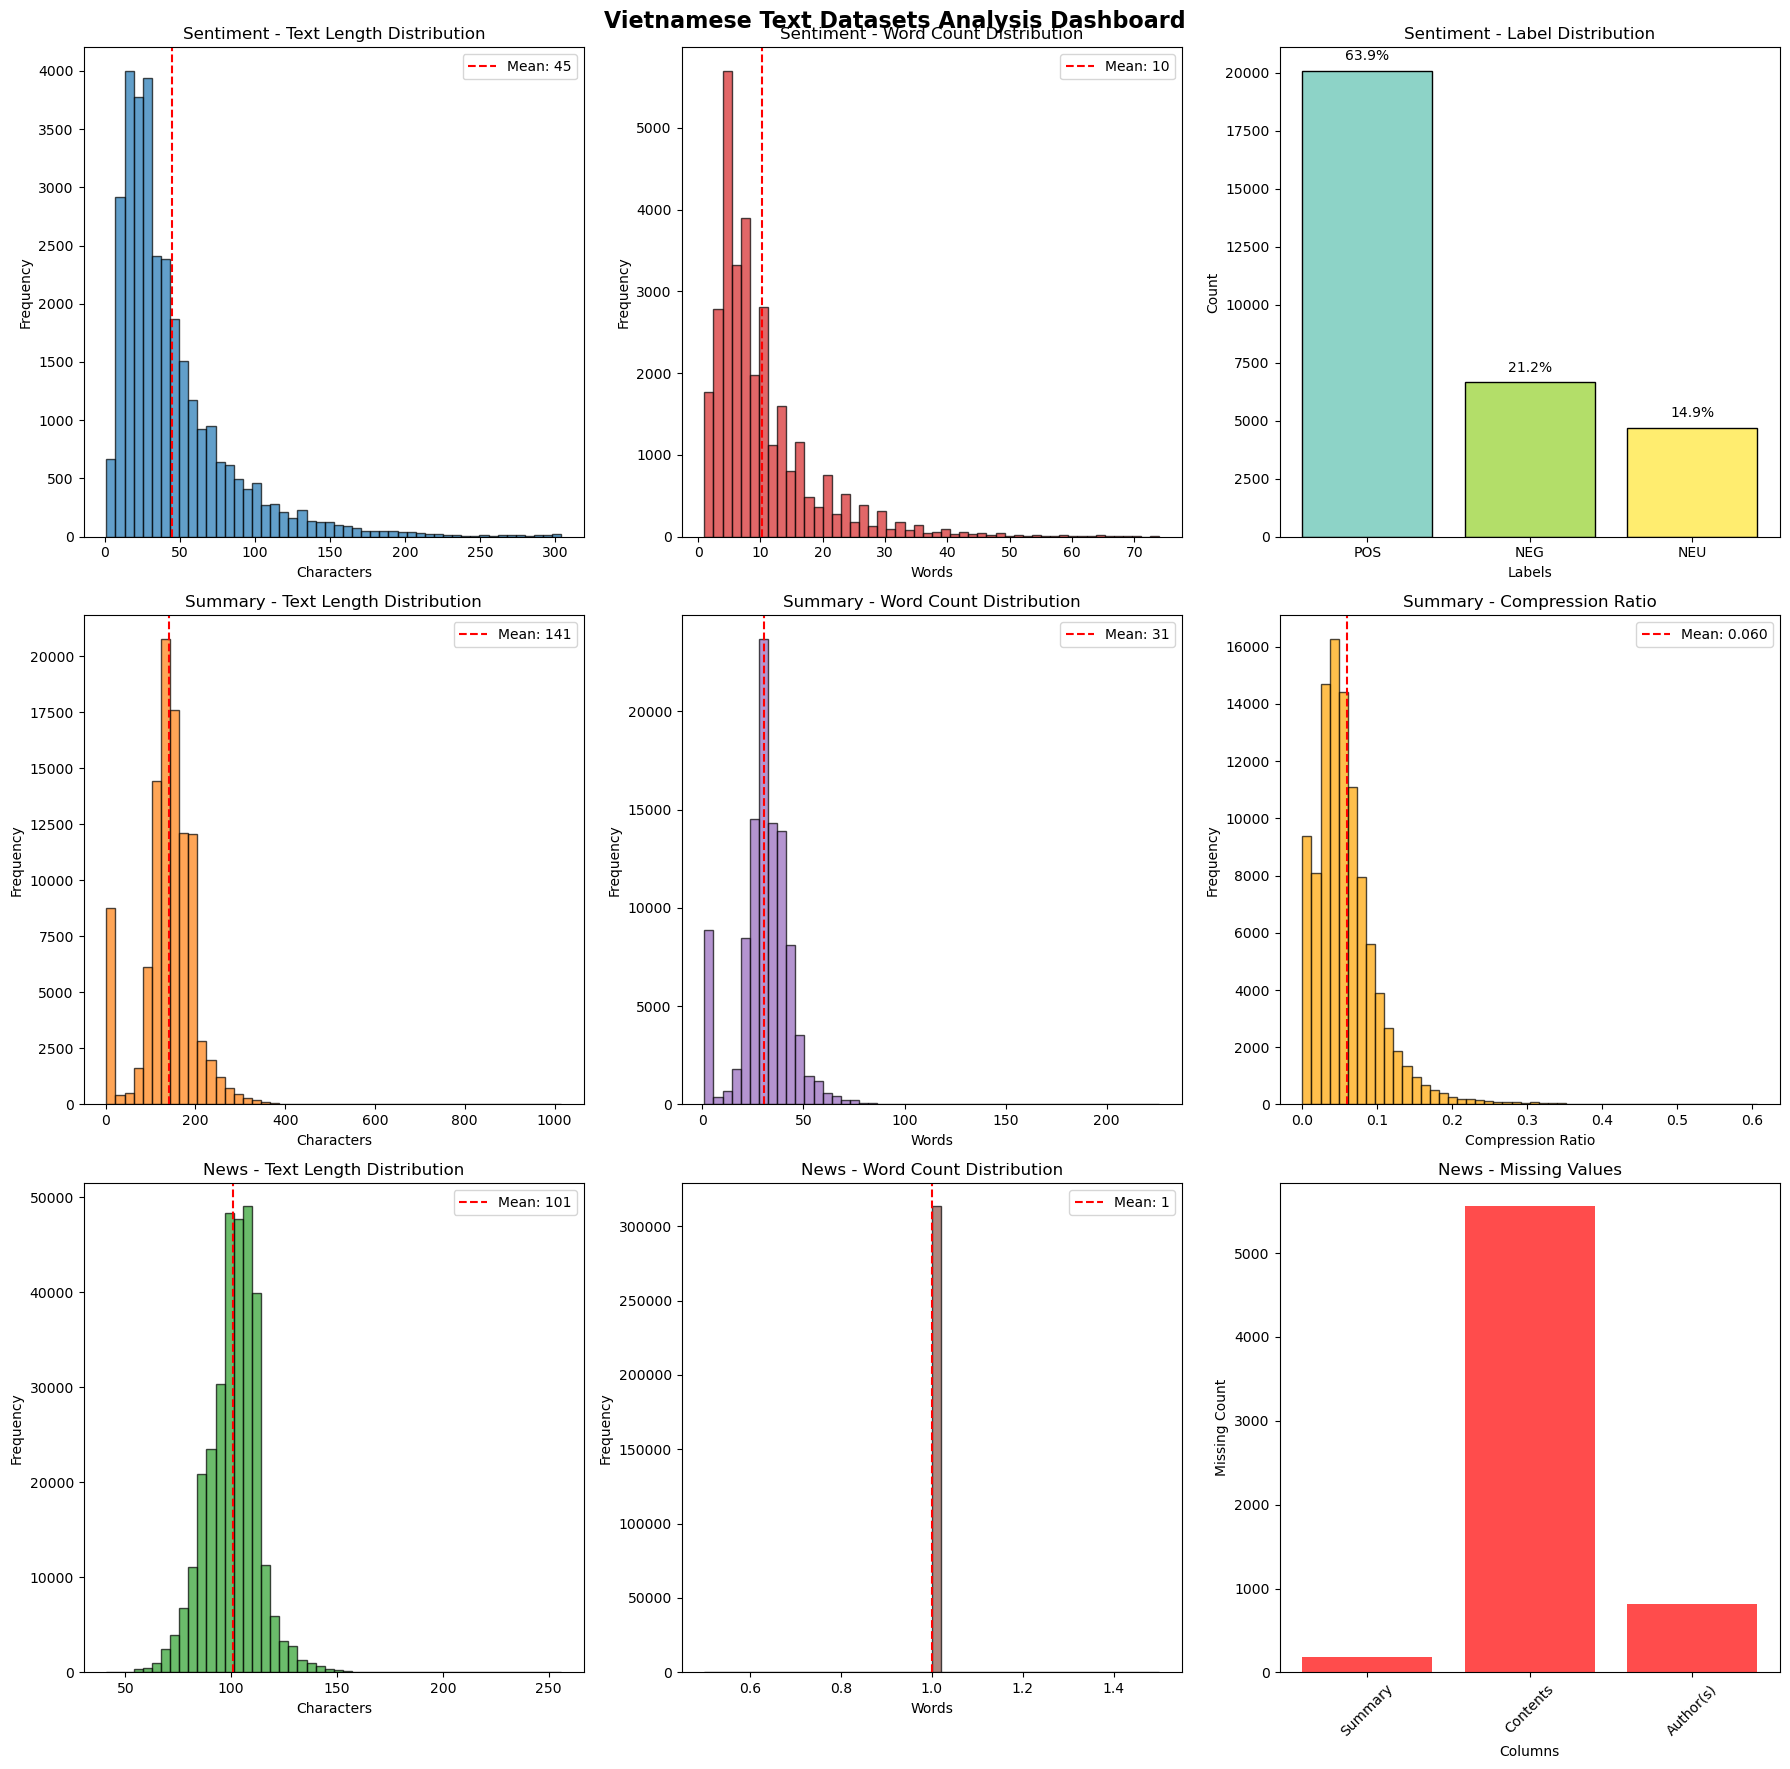

‚úì Dashboard created successfully!


In [ ]:
# Bi·ªÉu ƒë·ªì
print("t·∫°o bi·ªÉu ƒë·ªì")

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Ph√¢n t√≠ch d·ªØ li·ªáu', fontsize=14)

# Sentiment - ƒë·ªô d√†i comment
comment_lengths = df_sentiment['comment'].astype(str).str.len()
axes[0,0].hist(comment_lengths, bins=30, alpha=0.7, color='blue')
axes[0,0].set_title('Sentiment - ƒê·ªô d√†i comment')
axes[0,0].set_xlabel('K√Ω t·ª±')

# Sentiment - ph√¢n ph·ªëi nh√£n
label_counts = df_sentiment['label'].value_counts()
axes[0,1].bar(label_counts.index, label_counts.values, color=['green', 'red', 'gray'])
axes[0,1].set_title('Sentiment - Ph√¢n ph·ªëi nh√£n')
axes[0,1].set_ylabel('S·ªë l∆∞·ª£ng')

# Summary - ƒë·ªô d√†i text
text_lengths = df_summary['Text'].astype(str).str.len()
axes[1,0].hist(text_lengths, bins=30, alpha=0.7, color='orange')
axes[1,0].set_title('Summary - ƒê·ªô d√†i text')
axes[1,0].set_xlabel('K√Ω t·ª±')

# Summary - t·ª∑ l·ªá n√©n
summary_lengths = df_summary['Summary'].astype(str).str.len()
compression_ratios = summary_lengths / text_lengths
axes[1,1].hist(compression_ratios, bins=30, alpha=0.7, color='purple')
axes[1,1].set_title('Summary - T·ª∑ l·ªá n√©n')
axes[1,1].set_xlabel('T·ª∑ l·ªá')

plt.tight_layout()
plt.show()
print("ho√†n th√†nh")

In [ ]:
# T·ªïng k·∫øt
print("t·ªïng k·∫øt")

print(f"\nSentiment: {len(df_sentiment):,} m·∫´u")
print(f"Summary: {len(df_summary):,} m·∫´u")
print(f"T·ªïng: {len(df_sentiment) + len(df_summary):,} m·∫´u")

print(f"\nKhuy·∫øn ngh·ªã:")
print(f"- Sentiment: C·∫ßn c√¢n b·∫±ng d·ªØ li·ªáu (POS chi·∫øm {(df_sentiment['label'].value_counts()['POS']/len(df_sentiment)*100):.1f}%)")
print(f"- Summary: Ch·∫•t l∆∞·ª£ng t·ªët, t·ª∑ l·ªá n√©n h·ª£p l√Ω")
print(f"- S·∫µn s√†ng ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh")

# B·∫£ng t√≥m t·∫Øt ƒë∆°n gi·∫£n
summary_table = pd.DataFrame({
    'Dataset': ['Sentiment', 'Summary'],
    'S·ªë m·∫´u': [len(df_sentiment), len(df_summary)],
    'S·ªë c·ªôt': [len(df_sentiment.columns), len(df_summary.columns)],
    'Tr·∫°ng th√°i': ['C·∫ßn c√¢n b·∫±ng', 'S·∫µn s√†ng']
})

print(f"\nB·∫£ng t√≥m t·∫Øt:")
display(summary_table)

COMPREHENSIVE ANALYSIS SUMMARY REPORT

üìã DATASET SUMMARY:
  Sentiment: 31,460 samples, 4 columns
  Summary: 102,681 samples, 3 columns
  News: 313,320 samples, 8 columns

Total samples across all datasets: 447,461

üéØ RECOMMENDATIONS:

Data Quality:
  ‚ùå Sentiment: Address 31437 missing values
  ‚ùå Sentiment: High duplicate rate (12.7%) - consider deduplication
  ‚ùå Summary: Address 32 missing values
  ‚ùå News: Address 6558 missing values
  ‚ùå News: High duplicate rate (7.4%) - consider deduplication

Preprocessing:
  ‚ö†Ô∏è Sentiment.label: High rate of very short texts (100.0%)
  ‚ö†Ô∏è Sentiment.Unnamed: 3: High rate of very short texts (100.0%)
  ‚ö†Ô∏è Summary.Text: Consider text truncation for very long texts (93.9%)
  ‚ö†Ô∏è News.Contents: Consider text truncation for very long texts (87.5%)
  ‚ö†Ô∏è News.Author(s): High rate of very short texts (77.8%)
  ‚ö†Ô∏è News.Category: High rate of very short texts (88.6%)

Modeling:
  ‚ùå Sentiment: Highly imbalanced labels (r

Dataset    Rows  Columns  Missing Values  Duplicates Avg Text Length  \
0  Sentiment   31460        4           31437        3982            44.9   
1    Summary  102681        3              32           0           140.6   
2       News  313320        8            6558       23032           101.0   

  Memory (MB)  
0       10.06  
1      695.11  
2     1880.79